# Deep Learning Project - NLP

### Sentiment Analysis & Prediction on Reviews for DaVinci Book taken from various Media Blogs

This project is based on NLP as text-classification using Deep-Learning framework. 

Every document (which is a line in the input-file as CSV) is a sentence extracted from various Social Media Blogs. It is a labelled data where 1 means 'Positive Sentiment' and 0 means 'Negative Sentiment'.

We will use Tensorflow Tokenizer method to index each word and then getting converted into matrix basis TF-IDF approach.

Later, we have trained our model using Deep-Neural-Networks Fully-Connected Dense Layers. Final layer would be Sigmoid to classify sentiments into binary existence (0 or 1).

Since the documents are only 7086 in this dataset, we have just used TF-IDF approach to convert words into number representation. 

TF-IDF approach as used here, lacks in building semantic relationship which we have used via Gensim's Word2Vector method in another project here to understand semantics on reviews of IMDB Dataset.

### Approach

1. Getting Libraries and Dependencies
2. Defining Functions to Check Accuracy basis Confusion-Matrix at the end
3. Data Collection and tweaking it a bit
4. Data Processing
5. Preparing X and Y to further segregate into Train and Test
6. Implementing Tokenizer
7. Building/Training the Model
8. Predicting Sentiments
9. Evaluating Accuracy basis Confusion Matrix
10. Conclusion

***Let's begin...!***

# 1. Getting Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix

In [2]:
# Seeding
np.random.seed(42)

In [3]:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 2. Functions to Check Accuracy via Confusion-Matrix

In [4]:
# Function to Plot Confusion Matrix
def fun_plot_confusion_matrix(conf):
    plt.rcParams['figure.figsize'] = 3,2
    cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
    sns.heatmap(conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [5]:
# Function to Calculate & Print TPR / FPR / Specificity / Precision basis different Confusion-Matrix developed
def fun_conf_mat_calc(conf):
    conf_accuracy_score = ((conf.item(0) + conf.item(3)) / (conf.sum())) * 100
    print("Overall Accuracy of model is : %.4f" %conf_accuracy_score)
    
    TPR = Recall = Sensitivity = (conf.item(3) / (conf.item(2) + conf.item(3))) * 100
    print("TPRate or Recall or Sensitivity i.e. (TP / Actual YES): %.4f" %TPR)
    
    FPR = (conf.item(1) / (conf.item(0) + conf.item(1))) * 100
    print("FPRate RF_i.e. (FP / Actual NO): %.4f" %FPR)
    
    Specificity = conf.item(0) / (conf.item(0) + conf.item(1)) * 100
    print('Specificity i.e. (TN / Actual NO): %.4f' %Specificity)
    
    Precision = conf.item(3) / (conf.item(3) + conf.item(1)) * 100
    print('Precision i.e. (TP / Predicted YES): %.4f' %Precision)

# 3. Data Collection

In [6]:
path = 'Z:/Career/DataScientist/UPx/Certification_Ques_Apr_2018/Exam_datasets_April 22_2018/Section D-Deep Learning with NLP/'
df = pd.read_csv(path + 'nlp_data.csv', encoding='Latin1', header=None) # Fetching from actual File

In [7]:
df.shape
df.head()

(7086, 1)

,0
0,1 The Da Vinci Code book is just awesome.
1,1 this was the first clive cussler i've ...
2,1 i liked the Da Vinci Code a lot.
3,1 i liked the Da Vinci Code a lot.
4,1 I liked the Da Vinci Code but it ultim...


In [8]:
df.columns = ['Review']
df.head()

,Review
0,1 The Da Vinci Code book is just awesome.
1,1 this was the first clive cussler i've ...
2,1 i liked the Da Vinci Code a lot.
3,1 i liked the Da Vinci Code a lot.
4,1 I liked the Da Vinci Code but it ultim...


#### Function to get 1st Character into Sentiment as a number and remaining as the Text for Review
1. Loop through each ROWS into this DataSet
2. For each ROW, get FIRST Character and put into a list
3. Similarly, for this same ROW, get remaining Characters and put into another list

In [9]:
# Checking our concept
df.Review[1]
df.Review[1][0]
df.Review[1][1:].lstrip()

"1       this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."

'1'

"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."

In [10]:
Y = []  # List to hold FIRST Character which will be Number as SENTIMENT
Z = []  # List to hold remaining Characters as Review
for each_row in range(len(df)):
    Y.append(int(df.Review[each_row][0]))
    Z.append(str(df.Review[each_row][1:]).lstrip())

In [11]:
np.shape(Y)
Y[:10]
np.shape(Z)
Z[:5]

(7086,)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

(7086,)

['The Da Vinci Code book is just awesome.',
 "this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this.",
 'i liked the Da Vinci Code a lot.',
 'i liked the Da Vinci Code a lot.',
 "I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own."]

In [12]:
df.Review = Z
df['Sentiment'] = Y
df.head()

,Review,Sentiment
0,The Da Vinci Code book is just awesome.,1
1,this was the first clive cussler i've ever rea...,1
2,i liked the Da Vinci Code a lot.,1
3,i liked the Da Vinci Code a lot.,1
4,I liked the Da Vinci Code but it ultimatly did...,1


### Checking Net Sentiments

In [13]:
df.Sentiment.value_counts()

1    3995
0    3091
Name: Sentiment, dtype: int64

### Checking for Missing Values

In [14]:
df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

# 4. Data Processing

In [15]:
# Characters to be removed from the raw text
char_not_needed = ['*','<','>','\'','\"','[',']','\0','\1','\2','\3','\4','\5','\6','\7','\8','\9', '.', '/', ':', ';','!','?','(',')','&','%','+','-']

#### Function to Clean Blog text

In [16]:
def clean_text(data, remove_list):
    cleaned_text = []
    for data_unit in data:
        for char in remove_list:
            data_unit = data_unit.replace(char, '')
        data_unit = data_unit.lower()
        cleaned_text.append(data_unit)
    return cleaned_text

In [17]:
# Clean the raw text line by line
cleaned_text = clean_text(df.Review, char_not_needed)

In [18]:
df['Clean_Review'] = cleaned_text

In [19]:
df.sample(7)

,Review,Sentiment,Clean_Review
2991,I love Harry Potter.,1,i love harry potter
5728,"Is it just me, or does Harry Potter suck?...",0,"is it just me, or does harry potter suck"
711,"The Da Vinci Code was awesome, I can't wait to...",1,"the da vinci code was awesome, i cant wait to ..."
6286,Brokeback Mountain is fucking horrible..,0,brokeback mountain is fucking horrible
6072,"Not because I hate Harry Potter, but because I...",0,"not because i hate harry potter, but because i..."
2644,"I want to be here because I love Harry Potter,...",1,"i want to be here because i love harry potter,..."
408,Love luv lubb the Da Vinci Code!,1,love luv lubb the da vinci code


#### Getting New DF with Cleaned Text

In [20]:
df_mod = df.drop('Review', axis=1)

In [21]:
df_mod.head()

,Sentiment,Clean_Review
0,1,the da vinci code book is just awesome
1,1,this was the first clive cussler ive ever read...
2,1,i liked the da vinci code a lot
3,1,i liked the da vinci code a lot
4,1,i liked the da vinci code but it ultimatly did...


# 5. X and Y

In [22]:
X = df_mod.Clean_Review
Y = df_mod.Sentiment

In [23]:
# sklearn dependecies for train-test-split
from sklearn.model_selection import train_test_split

In [24]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=123)

In [25]:
for i in [trainX, trainY, testX, testY, X, Y]:
    i.shape, type(i)
    i[:1]

((4960,), pandas.core.series.Series)

5027    mission impossible 2 sucked by the way so i do...
Name: Clean_Review, dtype: object

((4960,), pandas.core.series.Series)

5027    0
Name: Sentiment, dtype: int64

((2126,), pandas.core.series.Series)

5824    these harry potter movies really suck
Name: Clean_Review, dtype: object

((2126,), pandas.core.series.Series)

5824    0
Name: Sentiment, dtype: int64

((7086,), pandas.core.series.Series)

0    the da vinci code book is just awesome
Name: Clean_Review, dtype: object

((7086,), pandas.core.series.Series)

0    1
Name: Sentiment, dtype: int64

# 6. Implementing Tokenizer (TF-IDF)

In [26]:
from tensorflow.python.keras.preprocessing.text import Tokenizer

C:\Users\Nivedit\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [27]:
# Setting Vocabulary
top_words = 2000
t = Tokenizer(num_words=top_words)

In [28]:
# Fitting only on trainX
t.fit_on_texts(trainX.tolist())

In [29]:
trainX_token = t.texts_to_matrix(trainX, mode='tfidf')
testX_token = t.texts_to_matrix(testX, mode='tfidf')

In [30]:
trainX_token.shape
testX_token.shape

(4960, 2000)

(2126, 2000)

In [31]:
trainX[0]
len(trainX[0])
trainX_token[0][100:170]
trainX_token[0].shape

'the da vinci code book is just awesome'

38

array([4.16805563, 4.19363405, 0.        , 0.        , 0.        ,
       0.        , 4.20668069, 4.21990508, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

(2000,)

In [32]:
len(t.word_index)
t.word_index

1854

{'i': 1,
 'the': 2,
 'and': 3,
 'potter': 4,
 'harry': 5,
 'vinci': 6,
 'da': 7,
 'brokeback': 8,
 'mountain': 9,
 'code': 10,
 'love': 11,
 'is': 12,
 'a': 13,
 'was': 14,
 'awesome': 15,
 'impossible': 16,
 'mission': 17,
 'like': 18,
 'to': 19,
 'movie': 20,
 'that': 21,
 'it': 22,
 'sucked': 23,
 'sucks': 24,
 'hate': 25,
 'because': 26,
 'my': 27,
 'so': 28,
 'as': 29,
 'much': 30,
 'of': 31,
 'stupid': 32,
 'movies': 33,
 'really': 34,
 'you': 35,
 'down': 36,
 'with': 37,
 'one': 38,
 'but': 39,
 'just': 40,
 'know': 41,
 '3': 42,
 'out': 43,
 'be': 44,
 'suck': 45,
 'loved': 46,
 'or': 47,
 'into': 48,
 'right': 49,
 'which': 50,
 'want': 51,
 'am': 52,
 'for': 53,
 'we': 54,
 'an': 55,
 'if': 56,
 'this': 57,
 'me': 58,
 'its': 59,
 'are': 60,
 'his': 61,
 'only': 62,
 'she': 63,
 'think': 64,
 'horrible': 65,
 'not': 66,
 'fucking': 67,
 'in': 68,
 'were': 69,
 'depressing': 70,
 'how': 71,
 'why': 72,
 'reading': 73,
 'series': 74,
 'guy': 75,
 'story': 76,
 'yeah': 77,
 'up

In [33]:
t.word_counts

OrderedDict([('mission', 774),
             ('impossible', 776),
             ('2', 74),
             ('sucked', 437),
             ('by', 78),
             ('the', 2239),
             ('way', 74),
             ('so', 335),
             ('i', 3197),
             ('dont', 76),
             ('know', 195),
             ('if', 148),
             ('wanna', 4),
             ('see', 34),
             ('3', 192),
             ('story', 122),
             ('of', 280),
             ('harry', 1444),
             ('potter', 1446),
             ('is', 1052),
             ('a', 894),
             ('deep', 55),
             ('and', 1525),
             ('profound', 55),
             ('one', 206),
             ('love', 1057),
             ('was', 808),
             ('excellent', 62),
             ('brokeback', 1399),
             ('mountain', 1398),
             ('awesome', 778),
             ('as', 322),
             ('sit', 53),
             ('here', 105),
             ('watching', 58),
             

# 7) Building the Model on these Tokenized items

Using Fully-Connected Dense Layer

In [34]:
# Getting Keras Sequential Model and Layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout

In [35]:
# Sequential model
model = Sequential()

In [36]:
# Layer 1 with 200 Neurons
model.add(Dense(200, activation = "relu", input_shape = (2000,)))

# Layer 2 with 100 Neurons
model.add(Dense(100, activation = "relu"))

# Adding Dropout as 25% to avoid Overfit
model.add(Dropout(0.25))

# Layer 3 with 60 Neurons
model.add(Dense(60, activation = "relu"))

# Adding Dropout as 50% to avoid Overfit
model.add(Dropout(0.5))

# Layer 4 with 30 Neuronw
model.add(Dense(30, activation = "relu"))

#### Final Layer with SIGMOID function to get output in 0 or 1

In [37]:
model.add(Dense(1, activation="sigmoid"))

Compile

In [38]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=(['accuracy']))

Fit

In [39]:
model.fit(trainX_token, trainY, validation_data=(testX_token, testY), batch_size=64, epochs=20)

Train on 4960 samples, validate on 2126 samples
Epoch 1/20
4960/4960 [==============================] - 7s - loss: 0.3226 - acc: 0.8778 - val_loss: 0.0470 - val_acc: 0.9821
Epoch 2/20
4960/4960 [==============================] - 2s - loss: 0.0193 - acc: 0.9958 - val_loss: 0.0487 - val_acc: 0.9873
Epoch 3/20
4960/4960 [==============================] - 2s - loss: 0.0030 - acc: 0.9998 - val_loss: 0.0617 - val_acc: 0.9854
Epoch 4/20
4960/4960 [==============================] - 2s - loss: 0.0035 - acc: 0.9998 - val_loss: 0.0549 - val_acc: 0.9873
Epoch 5/20
4960/4960 [==============================] - 2s - loss: 0.0015 - acc: 0.9998 - val_loss: 0.0627 - val_acc: 0.9868
Epoch 6/20
4960/4960 [==============================] - 2s - loss: 0.0029 - acc: 0.9998 - val_loss: 0.0584 - val_acc: 0.9864
Epoch 7/20
4960/4960 [==============================] - 2s - loss: 9.4769e-04 - acc: 0.9996 - val_loss: 0.0584 - val_acc: 0.9873
Epoch 8/20
4960/4960 [==============================] - 1s - loss: 5.5604

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               400200    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total para

## 8) Predicting Sentiments

In [41]:
pred_train_token = model.predict_classes(trainX_token)
pred_test_token = model.predict_classes(testX_token)

1920/2126 [==========================>...] - ETA: 0s

In [42]:
# Checking for actual data and predicted via Pandas.DataFrame 
for i in [trainY, pred_train_token, testY, pred_test_token]:
    pd.DataFrame(i).head(5)

,Sentiment
5027,0
2607,1
1501,1
3818,1
6363,0


,0
0,0
1,1
2,1
3,1
4,0


,Sentiment
5824,0
7027,0
1421,1
5072,0
4302,0


,0
0,0
1,0
2,1
3,0
4,0


## 9) Evaluating Accuracy basis Confusion-Matrix

Confusion Matrix for Train

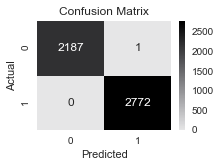

Overall Accuracy of model is : 99.9798
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 100.0000
FPRate RF_i.e. (FP / Actual NO): 0.0457
Specificity i.e. (TN / Actual NO): 99.9543
Precision i.e. (TP / Predicted YES): 99.9639


In [45]:
conf_train = confusion_matrix(trainY, pred_train_token)
fun_plot_confusion_matrix(conf_train)
fun_conf_mat_calc(conf_train)

Confusion Matrix for Test

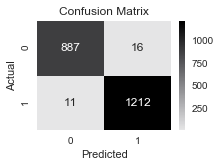

Overall Accuracy of model is : 98.7300
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 99.1006
FPRate RF_i.e. (FP / Actual NO): 1.7719
Specificity i.e. (TN / Actual NO): 98.2281
Precision i.e. (TP / Predicted YES): 98.6971


In [46]:
conf_test = confusion_matrix(testY, pred_test_token)
fun_plot_confusion_matrix(conf_test)
fun_conf_mat_calc(conf_test)

## 10) Conclusion

In [56]:
print("Basis above results, can find that for test, {} classes are not predicted correctly for Positive Sentiment.".format(conf_test.item(2)))
print("\t")
print("Basis above results, can find that for test, {} classes are not predicted correctly for Negative Sentiment.".format(conf_test.item(1)))

Basis above results, can find that for test, 11 classes are not predicted correctly for Positive Sentiment.
	
Basis above results, can find that for test, 16 classes are not predicted correctly for Negative Sentiment.


#### Basis above results, can find that for test, 11 classes are not predicted correctly for Positive Sentiment while 16 classes not predicted correctly for Negative Sentiment